<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/4.%20Deep%20Learning/4.%20number%20handwriting%20dataset/4_number_handwriting_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/75?category=1177429

dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

# 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # dataset을 불러오기 위한 load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader # batch 단위로 나누어서 데이터셋을 모델에 제공

In [6]:
# 데이터 불러오기
digits = load_digits()

# 데이터 보기
X_data = digits['data'] # 밝기 데이터가 들어있다.
X_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
y_data = digits['target']
y_data # 정답이 들어있다.

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
print(X_data.shape) # 이미지 자체
print(y_data.shape) # 정답

(1797, 64)
(1797,)


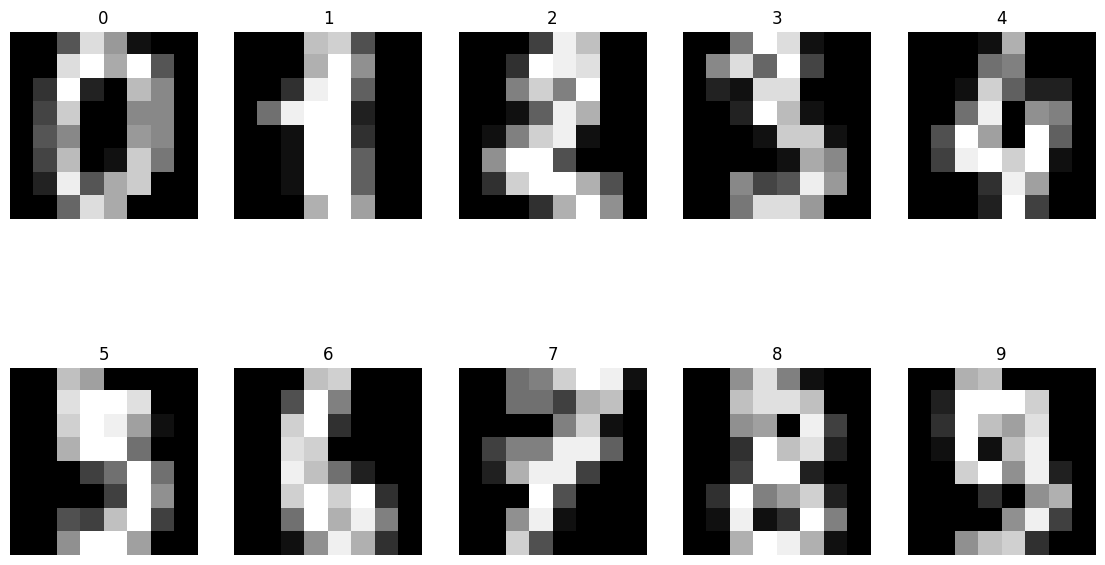

In [11]:
# 데이터 보기
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8)) # 축을 2행 5열

for i, ax in enumerate(axes.flatten()): # 일렬로 만드는 과정 (10바퀴를 돌린다.)
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [12]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data) # 결과가 class로 나올것이기 때문에 LongTensor로 넣어준다.

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape) # train data
print(x_test.shape, y_test.shape) # test data

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

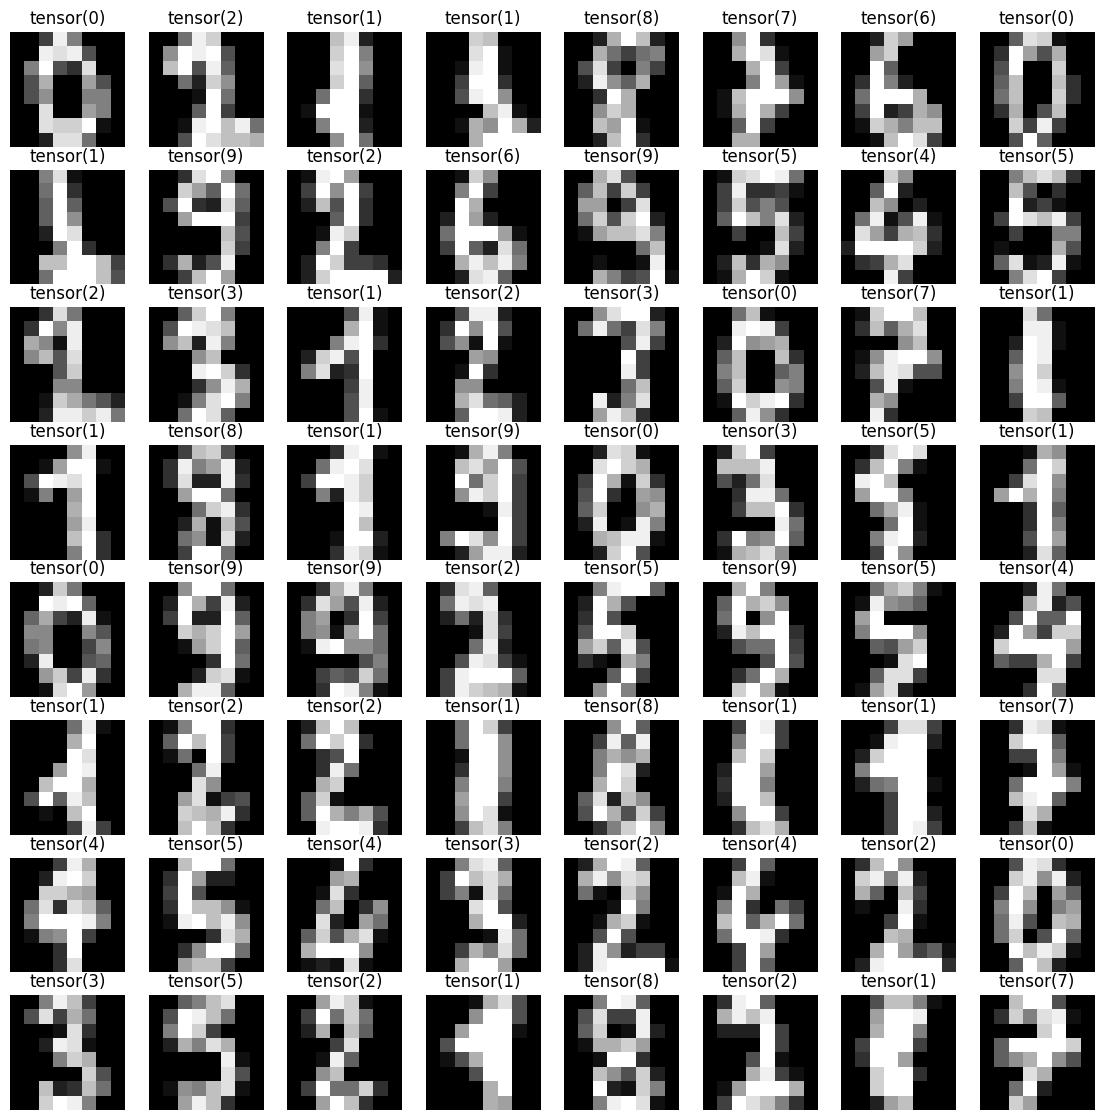

In [16]:
loader = DataLoader(
    dataset = list(zip(x_train, y_train)), # 문제집 데이터(x_train)와 정답 데이터(y_train)를 하나씩 짝지어 전체 데이터셋을 만듭니다.
    batch_size = 64, # 64개씩 데이터를 제공
    shuffle = True, # 데이터 섞임을 True
    drop_last = False # 학습하고 남은 데이터를 버리지 않고 사용한다.
)

# 64개의 img, 정답들을 각각 뽑아준다.
imgs, labels = next(iter(loader)) #iter() iterator로 만들어주는 함수 (순서가 있는 함수 )

# 시각화
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

In [17]:
model = nn.Sequential(
    nn.Linear(64, 10) # 64개의 인풋, 10개 아웃풋
)

optimizer = optim.Adam(model.parameters(), lr=0.01) # optimizer

epochs = 50 # 50바퀴동안 학습
for epoch in range(epochs + 1):
    sum_losses = 0 # 전체 lost 값
    sum_accs = 0 # 전체 accuracy 값

    # x_batch 이미지, ybatch 정답
    for x_batch, y_batch in loader:  # loader의 개수만큼 돌기 1437개/64 의 값
        y_pred = model(x_batch) # 이미지를 넣어서 예측
        loss = nn.CrossEntropyLoss()(y_pred, y_batch) # 다항으로 분류

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss # 오차값 누적 업데이트

        y_prob = nn.Softmax(1)(y_pred) # 확률적으로 누가 가장 높은지 뽑기

        y_pred_index = torch.argmax(y_prob, axis=1) # 그 인덱스번호를 이 확률에서 구해주기 (0~9중)

        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100 # accuracy 구하기

        sum_accs = sum_accs + acc # 정확도 누적 업데이트

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.662392 Accuracy: 62.70%
Epoch    1/50 Loss: 0.227363 Accuracy: 92.85%
Epoch    2/50 Loss: 0.152720 Accuracy: 95.18%
Epoch    3/50 Loss: 0.124020 Accuracy: 95.79%
Epoch    4/50 Loss: 0.123904 Accuracy: 95.95%
Epoch    5/50 Loss: 0.108037 Accuracy: 96.74%
Epoch    6/50 Loss: 0.085705 Accuracy: 97.06%
Epoch    7/50 Loss: 0.079264 Accuracy: 97.66%
Epoch    8/50 Loss: 0.062829 Accuracy: 98.08%
Epoch    9/50 Loss: 0.058417 Accuracy: 98.29%
Epoch   10/50 Loss: 0.054130 Accuracy: 98.76%
Epoch   11/50 Loss: 0.044038 Accuracy: 98.70%
Epoch   12/50 Loss: 0.044695 Accuracy: 98.82%
Epoch   13/50 Loss: 0.038982 Accuracy: 98.85%
Epoch   14/50 Loss: 0.033468 Accuracy: 99.52%
Epoch   15/50 Loss: 0.035150 Accuracy: 99.32%
Epoch   16/50 Loss: 0.036443 Accuracy: 98.97%
Epoch   17/50 Loss: 0.031570 Accuracy: 99.52%
Epoch   18/50 Loss: 0.026561 Accuracy: 99.46%
Epoch   19/50 Loss: 0.026470 Accuracy: 99.66%
Epoch   20/50 Loss: 0.025161 Accuracy: 99.66%
Epoch   21/50 Loss: 0.025278 Accur